#Lectures 8: DOE by Taguchi and Fractional Factorial and ANOVA


This notebook accompanies the ECE595 Data analytics course taught at Purdue in Fall 2022. These set of examples pertain to the materials of lecture 08.

Written by Rohan Sheridan (sherida7@purdue.edu)

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import operator
import collections
from sklearn.linear_model import LinearRegression
from scipy import stats

import matplotlib.patches as mpatches
import matplotlib.lines as mlines



In [2]:
## Set up the arrays for 3 factor, 2 level problem

x =   np.asarray([[-1., -1.,  1., -1.,  1.,  1., -1.],
                  [ 1., -1., -1., -1., -1.,  1.,  1.],
                  [-1.,  1., -1., -1.,  1., -1.,  1.],
                  [ 1.,  1.,  1., -1., -1., -1., -1.],
                  [-1., -1.,  1.,  1., -1., -1.,  1.],
                  [ 1., -1., -1.,  1.,  1., -1., -1.],
                  [-1.,  1., -1.,  1., -1.,  1., -1.],
                  [ 1.,  1.,  1.,  1.,  1.,  1.,  1.]])

## y array created to help visualize table when printed

y = np.transpose(np.asarray(
    [['(1)','a','b','ab','c','ac','bc','abc'],
     [67., 79., 61., 75., 59., 90., 52., 87.]]))

 
print(np.append(x,y,axis=1))


## Remove row labels becuase it affects array data type
## Strings in array force entire array to have string data type
## Cannot multiply strings and floats...

y = np.transpose(np.asarray(
     [[67., 79., 61., 75., 59., 90., 52., 87.]]))


vars = ['A','B','C','AB','BC','AC','ABC']

effects = {}

## initialize effects dictionary

for var in vars:

  effects[var] = 0

print("\n")

## to calculate the value associated with each factor 
## we take a dot protect between the values in a factor's column
## and the y column vector


for i in range(len(vars)):

  effect = np.dot(x[:,i],y)/4

  effects[vars[i]] = effect[0]


## After all factor values are calculated we should sort the dictonary
## based on value

effects = np.asarray(sorted(effects.items(), 
                       key=operator.itemgetter(1)))


label = effects[:,0]
value = effects[:,1].astype('float')

print("\nFactor: ", label,
      "\nEffect: ", value, '\n')

[['-1.0' '-1.0' '1.0' '-1.0' '1.0' '1.0' '-1.0' '(1)' '67.0']
 ['1.0' '-1.0' '-1.0' '-1.0' '-1.0' '1.0' '1.0' 'a' '79.0']
 ['-1.0' '1.0' '-1.0' '-1.0' '1.0' '-1.0' '1.0' 'b' '61.0']
 ['1.0' '1.0' '1.0' '-1.0' '-1.0' '-1.0' '-1.0' 'ab' '75.0']
 ['-1.0' '-1.0' '1.0' '1.0' '-1.0' '-1.0' '1.0' 'c' '59.0']
 ['1.0' '-1.0' '-1.0' '1.0' '1.0' '-1.0' '-1.0' 'ac' '90.0']
 ['-1.0' '1.0' '-1.0' '1.0' '-1.0' '1.0' '-1.0' 'bc' '52.0']
 ['1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' 'abc' '87.0']]



Factor:  ['B' 'AC' 'ABC' 'C' 'AB' 'BC' 'A'] 
Effect:  [-5.   0.   0.5  1.5  1.5 10.  23. ] 



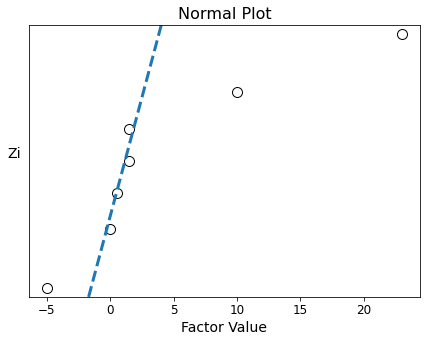

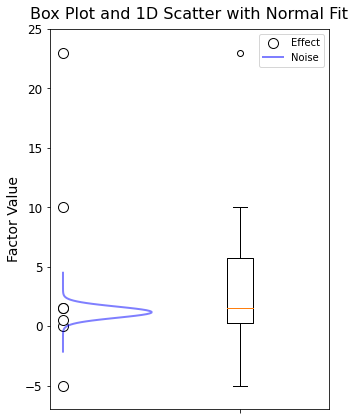

In [158]:
## Now we can perform statistical anaylsis on the values we got
## Calculate everything we need first, then plot


## set up the values of i to calculate Hazen CDF
i = np.arange(1,len(value)+1,1)

## Calculate Hazen CDF
fi = (i - 0.5)/(len(value))

## Calculate norm PDF values
qi = 4.91*(fi**(0.14) - (1 - fi)**(0.14))

## based of qi, find IQR bounderies
## We only want to do a linear fit on the qi values with the IQR
## lower is the 25th precentile and upper is the 75th precentile
lower,upper = np.quantile(qi,  [0.25, 0.75])

## initalize empty arrays for linear fit
xtrain = []
ytrain = []

## Only append x,y pairs for which qi is within the IQR
for x,y in zip(value,qi):

  if (lower<y and y<upper):

    ytrain.append(y)
    xtrain.append(x)


## convert lists to np array and reshape for fitting
xtrain = np.asarray(xtrain).reshape(-1, 1)
ytrain = np.asarray(ytrain).reshape(-1, 1)

## fit the data and obtain a prediction/fit line
reg = LinearRegression().fit(xtrain, ytrain)
yfit = reg.coef_*value + reg.intercept_


## This part is not necessary, but is nice for data visualization
## We want to take the qi values and fit a normal gaussian
## if we plot the fitted gaussian ontop of the qi values
## you can see which values are on the edge of the distibution
## these are outliers are therefore significant ...

loc, scale = stats.norm.fit(xtrain) # fit based on values in iqr
normRv = stats.norm(loc,scale)
xnorm =  x = np.linspace(normRv.ppf(10**-12),
                 normRv.ppf(1-10**-12), 100)

ynorm = stats.norm.pdf(xnorm, loc, scale)


## The rest is just for plotting

plt.figure(1,(7,5))

plt.scatter(value,qi,
            c='w',edgecolors='black',s=100)

plt.plot(value,yfit[0,:],ls='--',linewidth = 3)

offset = 0.1
plt.ylim([min(qi) - offset,
          max(qi) + offset])

plt.tick_params(axis='both', which='major', labelsize=12)

plt.yticks([])
plt.ylabel("Zi", fontsize = 14,
           labelpad = 15, rotation = 'horizontal')
plt.xlabel("Factor Value", fontsize = 14)

plt.title("Normal Plot", fontsize=16)

plt.show()

print('\n\n')



fig, ax = plt.subplots()
fig.canvas.draw()

fig.set_size_inches((5,7))

ax.boxplot(value)

val = ax.scatter(0*value,value,
            c='w',edgecolors='black',s=100)


nrm, = ax.plot(ynorm/max(2*ynorm),xnorm,linewidth = 2,
                      c = 'b',alpha = 0.5)

offset = 2

ax.set_ylim([min(value) - offset,
          max(value) + offset])


ax.legend([val, nrm], ["Effect", "Noise"])
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels([])
ax.set_ylabel("Factor Value", fontsize = 14)
ax.set_title("Box Plot and 1D Scatter with Normal Fit", 
             fontsize = 16,pad = 10)


plt.show()

print('\n\n')
